In [1]:
import numpy as np
import pandas as pd
import os
import glob as glob
import nibabel
import nilearn
from nilearn import image

In [2]:
filepath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM'
os.chdir(filepath)

In [3]:
filenames = glob.glob('s_03001_S_run*_unsorted_highres.nii.gz')
filenames

['s_03001_S_run1_unsorted_highres.nii.gz',
 's_03001_S_run2_unsorted_highres.nii.gz',
 's_03001_S_run3_unsorted_highres.nii.gz',
 's_03001_S_run4_unsorted_highres.nii.gz']

In [4]:
ips0roiname = '/fMRI/NLine-Space/s_03001/ROIs/IPS0_F2.nii.gz'
v1roiname = '/fMRI/NLine-Space/s_03001/ROIs/V1_F2.nii.gz'

In [5]:
ips0roinames = glob.glob('/fMRI/NLine-Space/s_03001/ROIs/IPS0_S*.nii.gz')
v1roinames = glob.glob('/fMRI/NLine-Space/s_03001/ROIs/V1_S*.nii.gz')

In [6]:
ips0roinames

['/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run1.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run2.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run3.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/IPS0_S_run4.nii.gz']

In [7]:
v1roinames

['/fMRI/NLine-Space/s_03001/ROIs/V1_S_run1.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run2.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run3.nii.gz',
 '/fMRI/NLine-Space/s_03001/ROIs/V1_S_run4.nii.gz']

In [8]:
run1 = nibabel.load(filenames[0])

In [9]:
run1.get_shape()

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Please use the shape property instead of get_shape
  if __name__ == '__main__':


(256, 256, 176, 26)

In [10]:
first = image.index_img(filenames[0],0)

In [11]:
first.get_shape()

/Users/frankanayet/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Please use the shape property instead of get_shape
  if __name__ == '__main__':


(256, 256, 176)

In [12]:
data = run1.get_data()

In [15]:
ips_mask = nibabel.load(ips0roiname)
v1_mask = nibabel.load(v1roiname)

In [16]:
from nilearn.plotting import plot_roi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

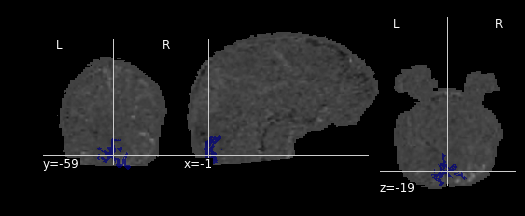

In [17]:
plot_roi(v1_mask,first)

###Consider resampling to lower resolution before masking the run

In [18]:
from nilearn.masking import apply_mask
ips_masked = apply_mask(run1,ips_mask)
v1_masked = apply_mask(run1,v1_mask)

In [19]:
ips_masked.shape

(26, 4558)

In [20]:
v1_masked.shape

(26, 7677)

In [21]:
from scipy.io import savemat

In [22]:
outname = 'ips0_trn.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [23]:
savemat(outpathname,{'ips0_trn':ips_masked})

In [24]:
from nilearn.input_data import NiftiMasker

In [25]:
v1_masker = NiftiMasker(mask_img=v1_mask, standardize=True)
ips0_masker = NiftiMasker(mask_img=ips_mask, standardize=True)

In [26]:
v1_masked = v1_masker.fit_transform(run1)
ips_masked = ips0_masker.fit_transform(run1)

In [27]:
v1_masked.shape

(26, 7677)

In [28]:
ips_masked.shape

(26, 4558)

In [29]:
v1_masked

array([[ 1.92054832,  1.45703888, -0.19335538, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97515857, -0.6545887 , -0.79179609, ...,  0.        ,
         0.        ,  0.        ],
       [-0.37094823, -0.21507819,  0.12759711, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 2.19368052,  2.73911262,  0.49728358, ...,  0.        ,
         0.        ,  0.        ],
       [-2.02939272, -2.10606241, -0.79671347, ...,  0.        ,
         0.        ,  0.        ],
       [-0.72430295, -0.42041683, -0.32220206, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

##Generalize to combine 3 runs for training set

In [30]:
runs = ['run1', 'run2', 'run3', 'run4']
maskpath = '/fMRI/NLine-Space/s_03001/ROIs/'
brains_dict = {}
for run in runs:
    print run
    filename = 's_03001_S_'+run+'_unsorted_highres.nii.gz'
    brains_dict[run] = {}
    brains_dict[run]['brain'] = nibabel.load(filename)
    ips_maskname = maskpath+'IPS0_F2.nii.gz'
    v1_maskname = maskpath+'V1_F2.nii.gz'
    #ips_maskname = maskpath+'IPS0_S_'+run+'.nii.gz'
    #v1_maskname = maskpath+'V1_S_'+run+'.nii.gz'
    v1_mask = nibabel.load(v1_maskname)
    ips0_mask = nibabel.load(ips_maskname)
    v1_masker = NiftiMasker(mask_img=v1_mask, standardize=True)
    ips0_masker = NiftiMasker(mask_img=ips0_mask, standardize=True)
    brains_dict[run]['v1_masked'] = v1_masker.fit_transform(brains_dict[run]['brain'])
    brains_dict[run]['ips_masked'] = ips0_masker.fit_transform(brains_dict[run]['brain'])
    print brains_dict[run]['ips_masked'].shape
    print brains_dict[run]['v1_masked'].shape

run1
(26, 4558)
(26, 7677)
run2
(26, 4558)
(26, 7677)
run3
(26, 4558)
(26, 7677)
run4
(26, 4558)
(26, 7677)


In [31]:
concat_ips = np.ma.concatenate([brains_dict['run1']['ips_masked'],brains_dict['run2']['ips_masked'],
                                 brains_dict['run3']['ips_masked']])
concat_v1 = np.ma.concatenate([brains_dict['run1']['v1_masked'],brains_dict['run2']['v1_masked'],
                                 brains_dict['run3']['v1_masked']])

In [32]:
concat_ips.shape

(78, 4558)

In [33]:
concat_v1.shape

(78, 7677)

In [38]:
outname = 'ips0_trn.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [39]:
savemat(outpathname,{'ips0_trn':concat_ips})

In [40]:
outname = 'v1_trn.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [41]:
savemat(outpathname,{'v1_trn':concat_v1})

In [66]:
ntrials = run1.shape[3]
trn_r = np.transpose(np.concatenate([np.repeat(1,ntrials),np.repeat(2,ntrials),np.repeat(3,ntrials)]))

In [67]:
trn_r.reshape((len(trn_r),1))
trn_r.shape

(78,)

In [68]:
trn_r = np.matrix(trn_r).transpose()

In [69]:
trn_r.shape

(78, 1)

##Create index for runs

In [70]:
outname = 'trn_r.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [71]:
savemat(outpathname,{'trn_r':trn_r})

## Now the test run

In [72]:
outname = 'ips0_tst.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [73]:
savemat(outpathname,{'ips0_tst':brains_dict['run4']['ips_masked']})

In [74]:
outname = 'v1_tst.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [75]:
savemat(outpathname,{'v1_tst':brains_dict['run4']['v1_masked']})

##Create index for test runs

In [76]:
tst_r = np.transpose(np.repeat(1,ntrials))
tst_r

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [77]:
tst_r = np.matrix(tst_r).transpose()
tst_r.shape

(26, 1)

In [78]:
outname = 'tst_r.mat'
outpath = '/fMRI/NLine-Space/s_03001/Peter_ROI_IEM/'
outpathname = outpath+outname

In [79]:
savemat(outpathname,{'tst_r':tst_r})